In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inf = 'test_stat/'
norm = 1.028

emc = pd.read_csv(inf + "dataframes/final/He3_H2.csv", index_col = 0)
emc['RatioNorm'] = emc.Ratio.apply(lambda x: x*norm)
emc['IsoNorm'] = emc.Isoscalar_Ratio.apply(lambda x: x*norm)

KP = pd.read_csv('KPsig.csv')

outf = 'Plots/Results_Plots/'
tblout = 'Plots/Results_Tables/'

In [3]:
emc.head()

,BinCenter,Ratio,RelStat,RelSyst,Counts,RelPre,RelBoiling,PositronCor,PositronError,ECCCor,...,He3RC,H2RC,RCErr,Isoscalar_Ratio,IsoCor,IsoCorError,RelRatioError,RelIsoscalarRatioError,RatioNorm,IsoNorm
0,0.195,1.041107,0.002516,0.006889,640115,0.003547,0.002501,1.000386,0.000612,0.984861,...,1.166959,1.167608,0.005,0.988151,0.949135,0.003623,0.007334,0.008180,1.070258,1.015820
1,0.225,1.041974,0.002680,0.006620,562334,0.003328,0.001973,1.000055,0.000370,0.985973,...,1.134697,1.136476,0.005,0.983710,0.944083,0.003609,0.007142,0.008002,1.071149,1.011254
2,0.255,1.041777,0.003761,0.006602,287917,0.004246,0.001970,0.999858,0.000254,0.987004,...,1.107570,1.109488,0.005,0.978397,0.939161,0.003753,0.007598,0.008475,1.070947,1.005792
3,0.285,1.049661,0.004212,0.006619,235048,0.004755,0.002205,0.999750,0.000220,0.987959,...,1.083117,1.085871,0.005,0.980782,0.934380,0.003808,0.007846,0.008721,1.079051,1.008244
4,0.315,1.036975,0.004499,0.006569,206506,0.005043,0.002278,0.999700,0.000216,0.988844,...,1.061731,1.064905,0.005,0.964128,0.929750,0.004171,0.007962,0.008989,1.066010,0.991123


In [4]:
no_norm_out = emc[['BinCenter', 'Ratio', 'Isoscalar_Ratio', 'RelRatioError', 'RelIsoscalarRatioError','RelStat','RelSyst','IsoCorError','He3RC','H2RC','IsoCor']].copy()
no_norm_out['Ratio_Error'] = no_norm_out.apply(lambda x: x.Ratio*x.RelRatioError, axis=1)
no_norm_out['RStat'] = no_norm_out.apply(lambda x: x.Ratio*x.RelStat, axis=1)
no_norm_out['RSyst'] = no_norm_out.apply(lambda x: x.Ratio*x.RelSyst, axis=1)
no_norm_out['IsoRatio_Error'] = no_norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelIsoscalarRatioError, axis=1)
no_norm_out['IsoStat'] = no_norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelStat, axis=1)
no_norm_out['IsoSyst'] = no_norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelSyst, axis=1)
no_norm_out['IsoCorErr'] = no_norm_out.apply(lambda x: x.Isoscalar_Ratio*x.IsoCorError, axis=1)

no_norm_out['RC'] = no_norm_out.apply(lambda x: np.around(x.He3RC/x.H2RC, decimals=3), axis=1)

no_norm_out = no_norm_out.drop(columns = ['RelRatioError', 'RelIsoscalarRatioError', 'RelStat', 'RelSyst', 'IsoCorError', 'He3RC', 'H2RC'])

no_norm_out.Ratio = no_norm_out.apply(lambda x: np.around(x.Ratio, decimals=3) if x.Ratio_Error*100<=1 else np.around(x.Ratio, decimals=3), axis=1)
no_norm_out.Isoscalar_Ratio = no_norm_out.apply(lambda x: np.around(x.Isoscalar_Ratio, decimals=3) if x.IsoRatio_Error*100<=1 else np.around(x.Isoscalar_Ratio, decimals=3), axis=1)
no_norm_out.Ratio_Error = no_norm_out.Ratio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
no_norm_out.IsoRatio_Error = no_norm_out.IsoRatio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))

no_norm_out.RStat = no_norm_out.RStat.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
no_norm_out.RSyst = no_norm_out.RSyst.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
no_norm_out.IsoStat = no_norm_out.IsoStat.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
no_norm_out.IsoSyst = no_norm_out.IsoSyst.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
no_norm_out.IsoCorErr = no_norm_out.IsoCorErr.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))

no_norm_out.IsoCor = no_norm_out.IsoCor.apply(lambda x: np.around(x,decimals=3))

no_norm_out.to_csv(tblout + 'no_norm.csv')

no_norm_out.head()

,BinCenter,Ratio,Isoscalar_Ratio,IsoCor,Ratio_Error,RStat,RSyst,IsoRatio_Error,IsoStat,IsoSyst,IsoCorErr,RC
0,0.195,1.041,0.988,0.949,0.0076,0.0026,0.0072,0.0081,0.0025,0.0068,0.0036,0.999
1,0.225,1.042,0.984,0.944,0.0074,0.0028,0.0069,0.0079,0.0026,0.0065,0.0036,0.998
2,0.255,1.042,0.978,0.939,0.0079,0.0039,0.0069,0.0083,0.0037,0.0065,0.0037,0.998
3,0.285,1.050,0.981,0.934,0.0082,0.0044,0.0069,0.0086,0.0041,0.0065,0.0037,0.997
4,0.315,1.037,0.964,0.930,0.0083,0.0047,0.0068,0.0087,0.0043,0.0063,0.0040,0.997


In [5]:
# norm_out = emc[['BinCenter', 'RatioNorm', 'IsoNorm', 'RelRatioError', 'RelIsoscalarRatioError']].copy()

# norm_out.rename(columns={'RatioNorm' : 'Ratio', 'IsoNorm' : 'Isoscalar_Ratio'},inplace=True)

# norm_out['Ratio_Error'] = norm_out.apply(lambda x: x.Ratio*x.RelRatioError, axis=1)
# norm_out['IsoRatio_Error'] = norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelIsoscalarRatioError, axis=1)
# norm_out = norm_out[['BinCenter', 'Ratio', 'Ratio_Error','Isoscalar_Ratio', 'IsoRatio_Error']].copy()

# norm_out.Ratio = norm_out.apply(lambda x: np.around(x.Ratio, decimals=3) if x.Ratio_Error*100<=1 else np.around(x.Ratio, decimals=3), axis=1)
# norm_out.Isoscalar_Ratio = norm_out.apply(lambda x: np.around(x.Isoscalar_Ratio, decimals=3) if x.IsoRatio_Error*100<=1 else np.around(x.Isoscalar_Ratio, decimals=3), axis=1)
# norm_out.Ratio_Error = norm_out.Ratio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
# norm_out.IsoRatio_Error = norm_out.IsoRatio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))

# norm_out.to_csv(tblout + 'norm.csv')

# norm_out.head()

norm_out = emc[['BinCenter', 'RatioNorm', 'IsoNorm', 'RelRatioError', 'RelIsoscalarRatioError','RelStat','RelSyst','IsoCorError','He3RC','H2RC','IsoCor']].copy()

norm_out.rename(columns={'RatioNorm' : 'Ratio', 'IsoNorm' : 'Isoscalar_Ratio'},inplace=True)

norm_out['Ratio_Error'] = norm_out.apply(lambda x: x.Ratio*x.RelRatioError, axis=1)
norm_out['RStat'] = norm_out.apply(lambda x: x.Ratio*x.RelStat, axis=1)
norm_out['RSyst'] = norm_out.apply(lambda x: x.Ratio*x.RelSyst, axis=1)
norm_out['IsoRatio_Error'] = norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelIsoscalarRatioError, axis=1)
norm_out['IsoStat'] = norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelStat, axis=1)
norm_out['IsoSyst'] = norm_out.apply(lambda x: x.Isoscalar_Ratio*x.RelSyst, axis=1)
norm_out['IsoCorErr'] = norm_out.apply(lambda x: x.Isoscalar_Ratio*x.IsoCorError, axis=1)

norm_out['RC'] = norm_out.apply(lambda x: np.around(x.He3RC/x.H2RC, decimals=3), axis=1)

norm_out = norm_out.drop(columns = ['RelRatioError', 'RelIsoscalarRatioError', 'RelStat', 'RelSyst', 'IsoCorError', 'He3RC', 'H2RC'])

norm_out.Ratio = norm_out.apply(lambda x: np.around(x.Ratio, decimals=3) if x.Ratio_Error*100<=1 else np.around(x.Ratio, decimals=3), axis=1)
norm_out.Isoscalar_Ratio = norm_out.apply(lambda x: np.around(x.Isoscalar_Ratio, decimals=3) if x.IsoRatio_Error*100<=1 else np.around(x.Isoscalar_Ratio, decimals=3), axis=1)
norm_out.Ratio_Error = norm_out.Ratio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
norm_out.IsoRatio_Error = norm_out.IsoRatio_Error.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))

norm_out.RStat = norm_out.RStat.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
norm_out.RSyst = norm_out.RSyst.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
norm_out.IsoStat = norm_out.IsoStat.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
norm_out.IsoSyst = norm_out.IsoSyst.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))
norm_out.IsoCorErr = norm_out.IsoCorErr.apply(lambda x: np.around(x, decimals=4) if x*100<=1 else np.around(x, decimals=3))

norm_out.IsoCor = norm_out.IsoCor.apply(lambda x: np.around(x,decimals=3))

norm_out.to_csv(tblout + 'norm.csv')

norm_out.head()

,BinCenter,Ratio,Isoscalar_Ratio,IsoCor,Ratio_Error,RStat,RSyst,IsoRatio_Error,IsoStat,IsoSyst,IsoCorErr,RC
0,0.195,1.070,1.016,0.949,0.0078,0.0027,0.0074,0.0083,0.0026,0.0070,0.0037,0.999
1,0.225,1.071,1.011,0.944,0.0077,0.0029,0.0071,0.0081,0.0027,0.0067,0.0036,0.998
2,0.255,1.071,1.006,0.939,0.0081,0.0040,0.0071,0.0085,0.0038,0.0066,0.0038,0.998
3,0.285,1.079,1.008,0.934,0.0085,0.0045,0.0071,0.0088,0.0042,0.0067,0.0038,0.997
4,0.315,1.066,0.991,0.930,0.0085,0.0048,0.0070,0.0089,0.0045,0.0065,0.0041,0.997


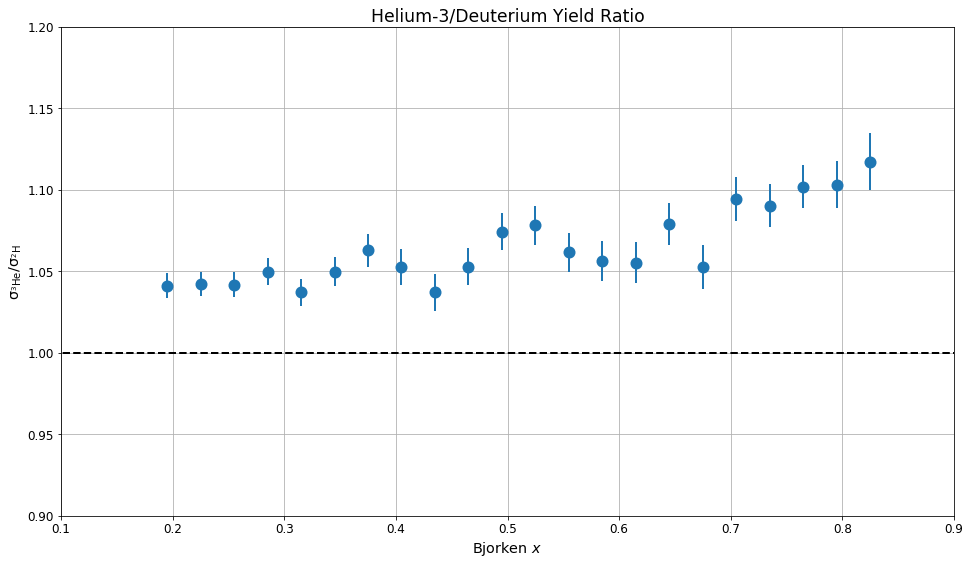

In [6]:
plt.figure(figsize=(16,9))
plt.plot([0,1],[1,1],'k--',linewidth=2)
plt.errorbar(emc['BinCenter'],emc['Ratio'],emc['RelRatioError']*emc['Ratio'],fmt='C0o',label="$^3$He/$^2$H Yield Ratio",ms=10,mew=2,elinewidth=2)

plt.gca().set(ylim=(0.9,1.2), xlim=(0.1,0.9))
#plt.legend(loc=2,fontsize='x-large')

plt.title("Helium-3/Deuterium Yield Ratio",fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel(r'$\mathrm{\sigma_{^{3}He}/\sigma_{^{2}H}}$',fontsize='x-large')

plt.xticks(np.arange(0.1,0.901,0.1),fontsize='large')
plt.yticks(np.arange(0.9,1.21,0.05),fontsize='large')

plt.grid()

plt.savefig(outf + 'yield_ratio.eps')

plt.show()

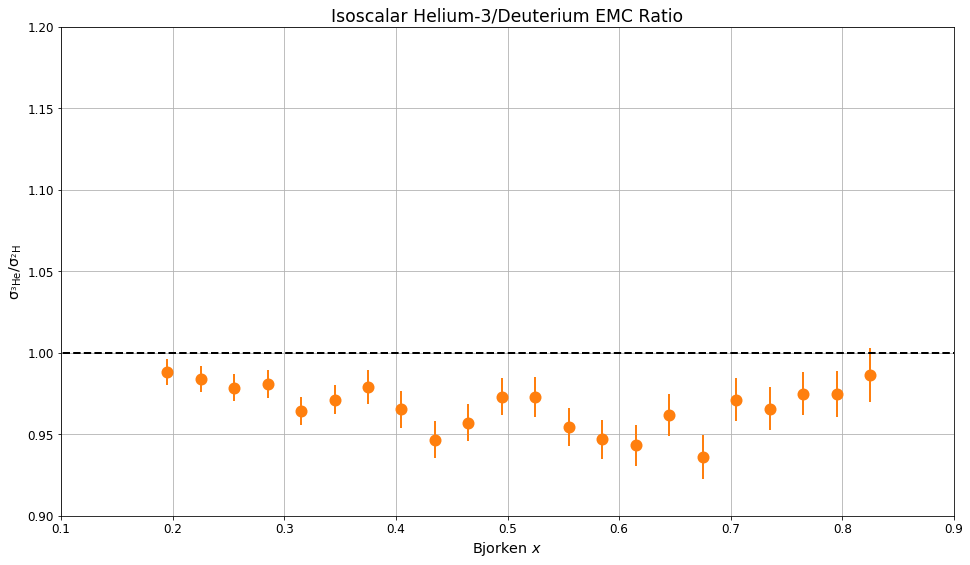

In [7]:
plt.figure(figsize=(16,9))
plt.plot([0,1],[1,1],'k--',linewidth=2)
plt.errorbar(emc['BinCenter'],emc['Isoscalar_Ratio'],emc['RelIsoscalarRatioError']*emc['Isoscalar_Ratio'],fmt='C1o',label="Isoscalar $^3$He/$^2$H EMC Ratio",ms=10,mew=2,elinewidth=2)

plt.gca().set(ylim=(0.9,1.2), xlim=(0.1,0.9))
#plt.legend(loc=2,fontsize='x-large')

plt.title("Isoscalar Helium-3/Deuterium EMC Ratio",fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel(r'$\mathrm{\sigma_{^{3}He}/\sigma_{^{2}H}}$',fontsize='x-large')

plt.xticks(np.arange(0.1,0.901,0.1),fontsize='large')
plt.yticks(np.arange(0.9,1.21,0.05),fontsize='large')

plt.grid()

plt.savefig(outf + 'emc_ratio.eps')

plt.show()

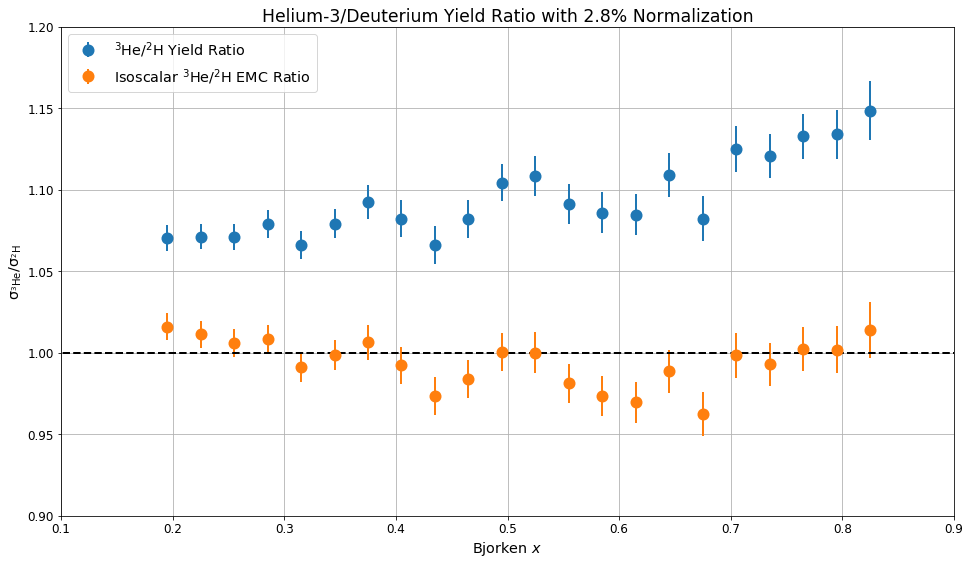

In [8]:
plt.figure(figsize=(16,9))
plt.plot([0,1],[1,1],'k--',linewidth=2)
plt.errorbar(emc['BinCenter'],emc['RatioNorm'],emc['RelRatioError']*emc['RatioNorm'],fmt='C0o',label="$^3$He/$^2$H Yield Ratio",ms=10,mew=2,elinewidth=2)
plt.errorbar(emc['BinCenter'],emc['IsoNorm'],emc['RelIsoscalarRatioError']*emc['IsoNorm'],fmt='C1o',label="Isoscalar $^3$He/$^2$H EMC Ratio",ms=10,mew=2,elinewidth=2)

plt.gca().set(ylim=(0.9,1.2), xlim=(0.1,0.9))
plt.legend(loc=2,fontsize='x-large')

plt.title("Helium-3/Deuterium Yield Ratio with 2.8% Normalization",fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel(r'$\mathrm{\sigma_{^{3}He}/\sigma_{^{2}H}}$',fontsize='x-large')

plt.xticks(np.arange(0.1,0.901,0.1),fontsize='large')
plt.yticks(np.arange(0.9,1.21,0.05),fontsize='large')

plt.grid()

plt.savefig(outf + 'ratio_norm.eps')

plt.show()

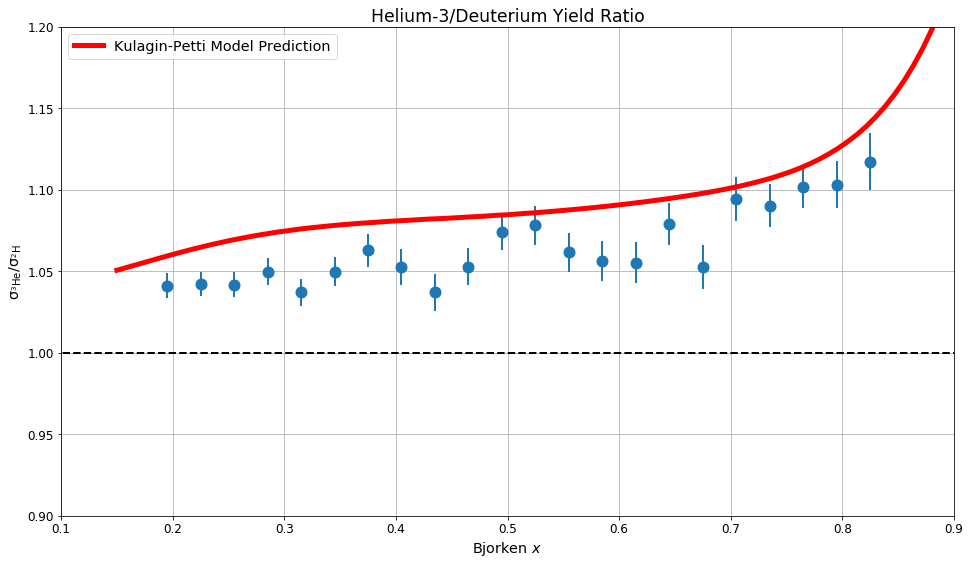

In [9]:
plt.figure(figsize=(16,9))
plt.plot([0,1],[1,1],'k--',linewidth=2)
plt.errorbar(emc['BinCenter'],emc['Ratio'],emc['RelRatioError']*emc['Ratio'],fmt='C0o',label='_nolegend_',ms=10,mew=2,elinewidth=2)
plt.plot(KP['x'],KP['ratio'],"r-",label="Kulagin-Petti Model Prediction",linewidth=5)

plt.gca().set(ylim=(0.9,1.2), xlim=(0.1,0.9))
plt.legend(loc=2,fontsize='x-large')

plt.title("Helium-3/Deuterium Yield Ratio",fontsize='xx-large')
plt.xlabel('Bjorken $x$',fontsize='x-large')
plt.ylabel(r'$\mathrm{\sigma_{^{3}He}/\sigma_{^{2}H}}$',fontsize='x-large')

plt.xticks(np.arange(0.1,0.901,0.1),fontsize='large')
plt.yticks(np.arange(0.9,1.21,0.05),fontsize='large')

plt.grid()

plt.savefig(outf + 'KPcomp.eps')

plt.show()